In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline

In [34]:
df_train = pd.read_csv("C:/Users/chada/Downloads/mnist/train.csv")
df_test = pd.read_csv("C:/Users/chada/Downloads/mnist/test.csv")

In [35]:
y_train = df_train['label']
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [36]:
x_train = df_train.drop('label', axis=1)
x_train = x_train.values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
x_train.shape

(42000, 784)

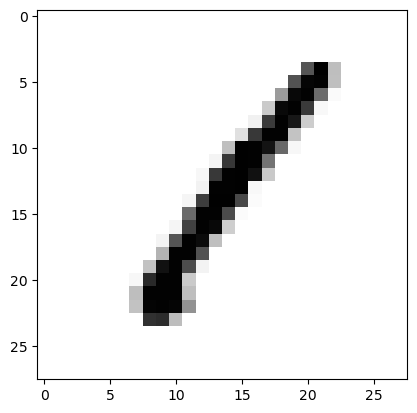

In [38]:
plt.imshow(x_train[0].reshape(28,28), cmap='Greys')
plt.show()

In [39]:
x_train = x_train.reshape(42000,28,28)

In [40]:
x_train.shape

(42000, 28, 28)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=19)

In [42]:
x_train.shape

(37800, 28, 28)

In [43]:
x_valid.shape

(4200, 28, 28)

In [44]:
from tensorflow.keras.utils import to_categorical
y_cat_valid = to_categorical(y_valid, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

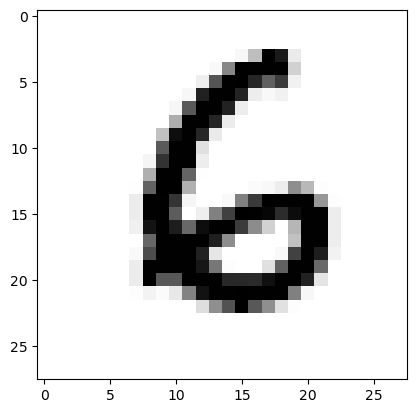

In [45]:
first_image = x_train[0]
plt.imshow(first_image, cmap='Greys')
plt.show()

In [46]:
print('Actual image:')
print(y_train[0])

Actual image:
1


In [47]:
first_image.max()

254

In [48]:
first_image.min()

0

In [49]:
x_train_scaled = x_train/255
x_valid_scaled = x_valid/255

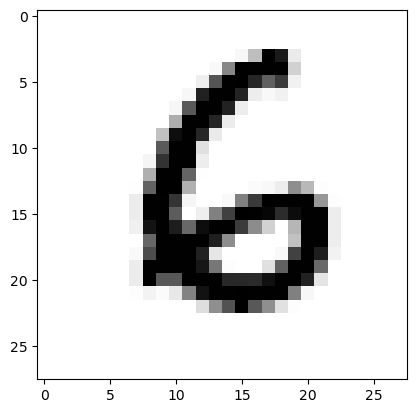

In [50]:
plt.imshow(x_train_scaled[0], cmap='Greys')
plt.show()

In [51]:
x_train_final = x_train_scaled.reshape(37800,28,28,1)
x_valid_final = x_valid_scaled.reshape(4200,28,28,1)

In [52]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout



In [53]:
model = Sequential()

# Convolution layer 1
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), input_shape=(28,28,1), padding='Same', activation='relu'))
# Convolution layer 2
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), input_shape=(28,28,1), padding='Same', activation='relu'))
# Pooling layer (selected half of kernel_size)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Convolution layer 3
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(28,28,1), padding='Same', activation='relu'))
# Convolution layer 4
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(28,28,1), padding='Same', activation='relu'))
# Pooling layer (selected half of kernel_size)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flattening image
model.add(Flatten())
# Dense layer
model.add(Dense(256, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:

from tensorflow.keras.callbacks import EarlyStopping

In [55]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
image_gen = ImageDataGenerator(rotation_range=10,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              fill_mode='nearest')

In [58]:
train_image_gen = image_gen.fit(x_train_final)

In [59]:
train_image_gen

In [62]:
model.fit_generator(image_gen.flow(x_train_final, y_cat_train), epochs=10, validation_data=(x_valid_final, y_cat_valid), callbacks=[early_stop])

Epoch 1/10


C:\Users\chada\AppData\Local\Temp\ipykernel_23488\3436906532.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(image_gen.flow(x_train_final, y_cat_train), epochs=10, validation_data=(x_valid_final, y_cat_valid), callbacks=[early_stop])


1182/1182 [==============================] - 141s 120ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0615 - val_accuracy: 0.9802
Epoch 2/10
1182/1182 [==============================] - 142s 120ms/step - loss: 0.0416 - accuracy: 0.9868 - val_loss: 0.0279 - val_accuracy: 0.9910
Epoch 3/10
1182/1182 [==============================] - 142s 121ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0229 - val_accuracy: 0.9945
Epoch 4/10
1182/1182 [==============================] - 101s 85ms/step - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0287 - val_accuracy: 0.9917
Epoch 5/10
1182/1182 [==============================] - 81s 68ms/step - loss: 0.0371 - accuracy: 0.9881 - val_loss: 0.0344 - val_accuracy: 0.9914


In [67]:


metrics = pd.DataFrame(model.history.history)
metrics



,loss,accuracy,val_loss,val_accuracy
0,0.044511,0.986323,0.061499,0.980238
1,0.041602,0.986772,0.027896,0.990952
2,0.036636,0.988598,0.022929,0.994524
3,0.035119,0.989048,0.028716,0.991667
4,0.037063,0.988148,0.034444,0.991429


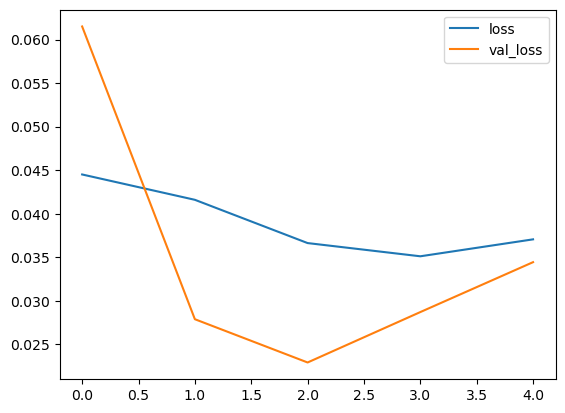

In [68]:
metrics[['loss', 'val_loss']].plot()
plt.show()

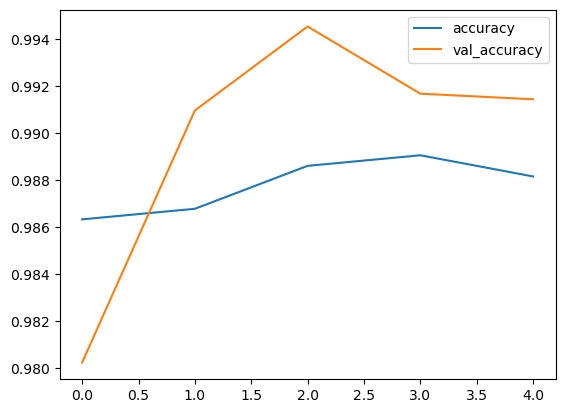

In [69]:


metrics[['accuracy', 'val_accuracy']].plot()
plt.show()



In [70]:


model.evaluate(x_valid_final, y_cat_valid, verbose=0)



[0.034443534910678864, 0.991428554058075]

In [74]:
y_pred_probabilities = model.predict(x_valid_final)
y_pred = np.argmax(y_pred_probabilities, axis=1)
print(y_pred)

132/132 [==============================] - 2s 16ms/step
[7 7 5 ... 8 1 4]


In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(y_valid, y_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_valid, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       417
           1       1.00      1.00      1.00       476
           2       0.99      1.00      0.99       384
           3       1.00      0.98      0.99       451
           4       1.00      0.98      0.99       391
           5       0.97      1.00      0.99       424
           6       0.98      1.00      0.99       403
           7       0.99      0.99      0.99       470
           8       0.99      0.97      0.98       383
           9       0.98      0.99      0.99       401

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



Confusion Matrix:
[[415   0   0   0   0   0   2   0   0   0]
 [  0 476   0   0   0   0   0   0   0   0]
 [  0   0 383   0   0   0   0   0   1   0]
 [  0   0   0 444   0   3   0   1   0   3]
 [  0   1   0   0 385   0 

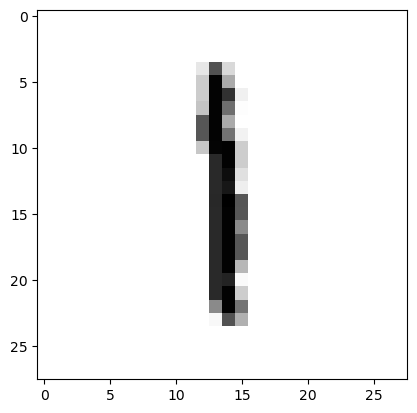

In [76]:
np.random.seed(19)
random_selection = np.random.randint(0, 4201, size=1)
random_sample = x_valid_final[random_selection]
plt.imshow(random_sample.reshape(28,28), cmap='Greys')
plt.show()

In [78]:
print('Prediction:')
predicted_probabilities = model.predict(random_sample.reshape(1, 28, 28, 1))
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]
print(predicted_class)

Prediction:
1/1 [==============================] - 0s 16ms/step
1


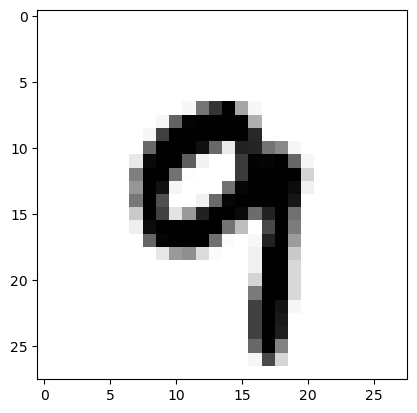

In [79]:
np.random.seed(20)
random_selection_2 = np.random.randint(0, 4201, size=1)
random_sample_2 = x_valid_final[random_selection_2]
plt.imshow(random_sample_2.reshape(28,28), cmap='Greys')
plt.show()

In [81]:
print('Prediction:')
predicted_probabilities = model.predict(random_sample_2.reshape(1, 28, 28, 1))
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]
print(predicted_class)

Prediction:
1/1 [==============================] - 0s 26ms/step
9


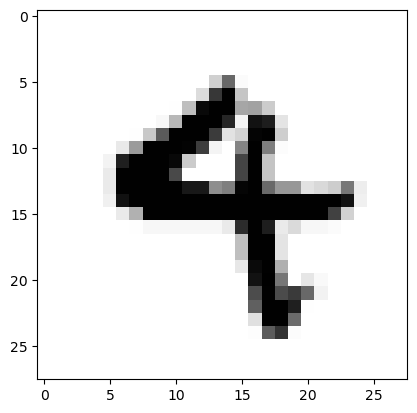

In [82]:
np.random.seed(22)
random_selection_3 = np.random.randint(0, 4201, size=1)
random_sample_3 = x_valid_final[random_selection_3]
plt.imshow(random_sample_3.reshape(28,28), cmap='Greys')
plt.show()

In [84]:
print('Prediction:')
predicted_probabilities = model.predict(random_sample_3.reshape(1, 28, 28, 1))
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]
print(predicted_class)

Prediction:
1/1 [==============================] - 0s 37ms/step
4


In [85]:
x_test = df_test.values
x_test = x_test.reshape(28000,28,28)
x_test.shape

(28000, 28, 28)

In [86]:
x_test_scaled = x_test/255

In [88]:
test_predictions_probabilities = model.predict(x_test_scaled.reshape(28000, 28, 28, 1))
test_predictions = np.argmax(test_predictions_probabilities, axis=1)
print(test_predictions)

875/875 [==============================] - 14s 16ms/step
[2 0 9 ... 3 9 2]


In [89]:


test_predictions



array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [90]:
# Save test predictions to file
output = pd.DataFrame({'ImageId': df_test.index + 1,
                       'Label': test_predictions})
output.to_csv('submission.csv', index=False)

In [94]:
print("Done by Sree venkateswarlu")

Done by Sree venkateswarlu
